<a href="https://colab.research.google.com/github/acgowda/market-flow/blob/main/model/model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# df = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/stock_data3.csv')
train = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/daily_train_15-19.csv')
test = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/daily_test_21-22.csv')

In [6]:
train.head()

,Date,open,high,low,close,volume,ma5,ma20,ma60,ma200,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,2017-02-24,-0.004975,-0.004160,-0.000578,0.005131,-0.353873,-0.002895,-0.004106,0.001372,0.001192,...,0,0,1,0,0,0,0,0,0,0
1,2018-03-05,0.016585,0.007097,0.013997,0.002600,-0.107817,0.001940,0.002069,0.000521,-0.000132,...,0,0,0,1,0,0,0,0,0,0
2,2019-03-20,-0.011576,-0.013462,-0.006976,0.016155,-0.079744,-0.004009,0.001560,0.001419,0.000539,...,0,0,0,1,0,0,0,0,0,0
3,2019-04-08,-0.002434,0.006996,-0.003820,-0.018972,0.180207,0.007415,0.003894,0.002793,0.000547,...,0,0,0,0,1,0,0,0,0,0
4,2019-06-04,0.011535,0.003702,-0.004446,0.016835,-0.367681,-0.001624,0.000403,0.000146,0.000717,...,0,0,0,0,0,0,1,0,0,0


In [13]:
high_change_cols = list(train.describe().loc['max'][train.describe().loc['max'] > 10].index)
drop_cols = ['Date'] + high_change_cols
drop_cols

['Date', 'volume', 'GC=F-volume']

In [14]:
def get_Xy(df):
    new = df.drop(drop_cols, axis = 1)
    new['target'] = new['close'].apply(lambda x: 1 if x > 0 else 0)
    new = new.drop(['close'], axis = 1)
    
    return new.drop(columns=['target']), new['target']

In [15]:
X, y = get_Xy(train)

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y,
                                                  random_state = 42,
                                                  test_size = 0.3)

In [17]:
X.columns

Index(['open', 'high', 'low', 'ma5', 'ma20', 'ma60', 'ma200', '^GSPC-close',
       '^GSPC-volume', '^GSPC-ma5', '^GSPC-ma20', '^GSPC-ma60', '^GSPC-ma200',
       '^VIX-close', '^VIX-ma5', '^VIX-ma20', '^VIX-ma60', '^VIX-ma200',
       '^IXIC-close', '^IXIC-volume', '^IXIC-ma5', '^IXIC-ma20', '^IXIC-ma60',
       '^IXIC-ma200', '^DJI-close', '^DJI-volume', '^DJI-ma5', '^DJI-ma20',
       '^DJI-ma60', '^DJI-ma200', '^HSI-close', '^HSI-volume', '^HSI-ma5',
       '^HSI-ma20', '^HSI-ma60', '^HSI-ma200', '^FTSE-close', '^FTSE-volume',
       '^FTSE-ma5', '^FTSE-ma20', '^FTSE-ma60', '^FTSE-ma200', '^FCHI-close',
       '^FCHI-volume', '^FCHI-ma5', '^FCHI-ma20', '^FCHI-ma60', '^FCHI-ma200',
       'GC=F-close', 'GC=F-ma5', 'GC=F-ma20', 'GC=F-ma60', 'GC=F-ma200',
       'CL=F-close', 'CL=F-volume', 'CL=F-ma5', 'CL=F-ma20', 'CL=F-ma60',
       'CL=F-ma200', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
      

In [23]:
model = tf.keras.models.Sequential([
    layers.Dense(128, input_shape=(76,), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2)
])

In [24]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs = 25, batch_size = 64, 
                    shuffle = True, verbose=1)

Epoch 1/25
4664/4664 [==============================] - 18s 4ms/step - loss: 0.6588 - accuracy: 0.5955 - val_loss: 0.6198 - val_accuracy: 0.6525
Epoch 2/25
4664/4664 [==============================] - 15s 3ms/step - loss: 0.6205 - accuracy: 0.6481 - val_loss: 0.6009 - val_accuracy: 0.6657
Epoch 3/25
4664/4664 [==============================] - 15s 3ms/step - loss: 0.6108 - accuracy: 0.6581 - val_loss: 0.5955 - val_accuracy: 0.6712
Epoch 4/25
4664/4664 [==============================] - 15s 3ms/step - loss: 0.6059 - accuracy: 0.6626 - val_loss: 0.5929 - val_accuracy: 0.6711
Epoch 5/25
4664/4664 [==============================] - 17s 4ms/step - loss: 0.6030 - accuracy: 0.6652 - val_loss: 0.5911 - val_accuracy: 0.6735
Epoch 6/25
4664/4664 [==============================] - 16s 3ms/step - loss: 0.6017 - accuracy: 0.6664 - val_loss: 0.5910 - val_accuracy: 0.6774
Epoch 7/25
4664/4664 [==============================] - 15s 3ms/step - loss: 0.6001 - accuracy: 0.6683 - val_loss: 0.5908 - val_ac

In [25]:
def plot_history(hist):
    plt.plot(hist.history["accuracy"], label = "training")
    plt.plot(hist.history["val_accuracy"], label = "validation")
    plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
    plt.legend()
    plt.show()

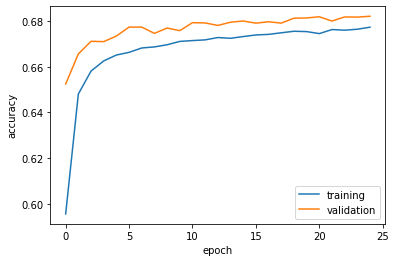

In [26]:
plot_history(history)

In [31]:
test.head()

,Date,open,high,low,close,volume,ma5,ma20,ma60,ma200,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,2021-10-18,0.000488,0.005584,0.004843,0.006715,0.161973,0.012670,0.001331,0.000297,0.001422,...,0,0,0,0,0,0,0,0,0,0
1,2021-07-29,-0.005628,-0.007298,-0.002888,0.004053,-0.145173,0.002889,-0.002065,-0.001475,0.000924,...,0,0,0,0,0,0,0,1,0,0
2,2021-08-20,-0.018482,-0.001936,0.013491,0.060700,-0.424071,-0.017294,0.000150,-0.000302,0.003726,...,0,0,0,0,0,0,0,0,1,0
3,2022-03-22,-0.001782,0.019471,0.016791,-0.030686,-0.141925,0.018248,0.001000,-0.001862,-0.000985,...,0,0,0,1,0,0,0,0,0,0
4,2022-06-13,-0.022221,-0.027558,-0.034563,0.015037,0.151207,-0.017013,-0.000252,-0.000290,0.001048,...,0,0,0,0,0,0,1,0,0,0


In [27]:
X_test, y_test = get_Xy(test)

In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy :', accuracy)

3933/3933 [==============================] - 9s 2ms/step - loss: 0.7578 - accuracy: 0.5054
Test accuracy : 0.5053635835647583


In [ ]:
model.save('/content/drive/Shareddrives/PIC 16B Project/model_week')

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/PIC 16B Project/model_week/assets
